In [1]:
import numpy as np 
import scipy as sc
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from math import pi
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves


# Subir el archivo
mnist = pd.read_csv("./sample_data/mnist_train_small.csv",header=None)
print("Shape of the dataset:", mnist.shape)




Shape of the dataset: (20000, 785)


In [2]:
# Guardamos la X y la respuesta Y
mnist_mat=mnist.as_matrix()
X= mnist_mat[:, 1:]
Y= mnist_mat[:, 0:1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Frequency of observations in each category:
[[   0    1    2    3    4    5    6    7    8    9]
 [1962 2243 1989 2021 1924 1761 2039 2126 1912 2023]]


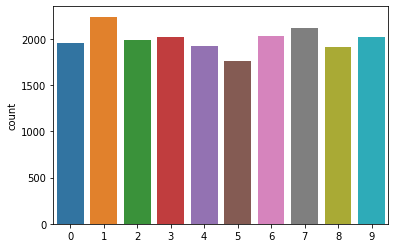

In [3]:
# ¿Estan las clases balanceadas?
ax = sb.countplot(Y[:,0],label="Count")      
unique_elements, counts_elements = np.unique(Y, return_counts=True)
print("Frequency of observations in each category:")
print(np.asarray((unique_elements, counts_elements)))


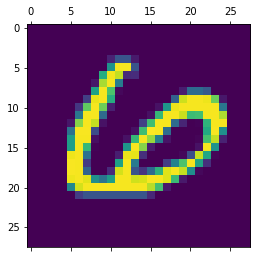

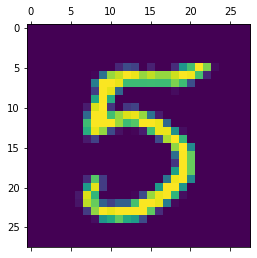

In [8]:
plt.matshow(X[0,:].reshape(28,28))
plt.matshow(X[1,:].reshape(28,28))

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



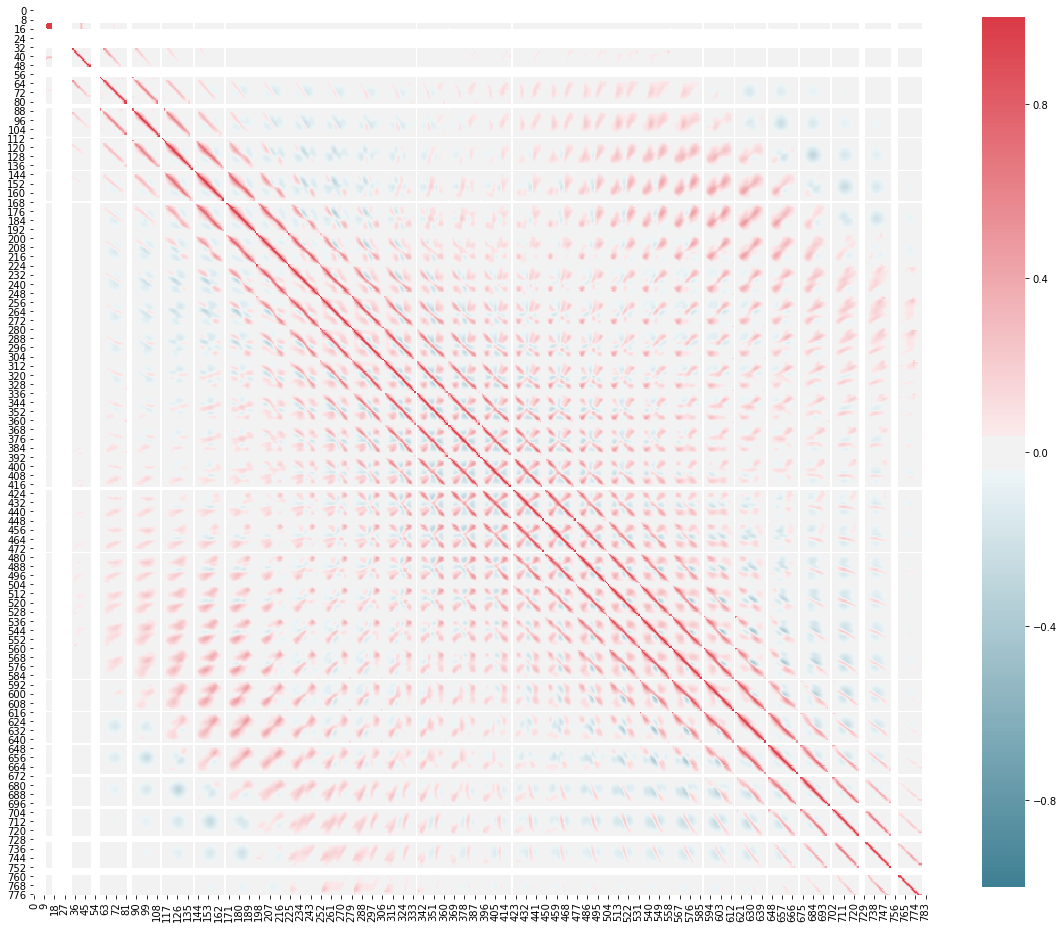

In [6]:
# Correlaciones
corrmat=np.corrcoef(X.T)
plt.show()
plt.figure(figsize=(20,20))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
ax=sb.heatmap(corrmat,vmin=-1, vmax=1,center=0,square=True,cmap=cmap,cbar_kws={"shrink": .8})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



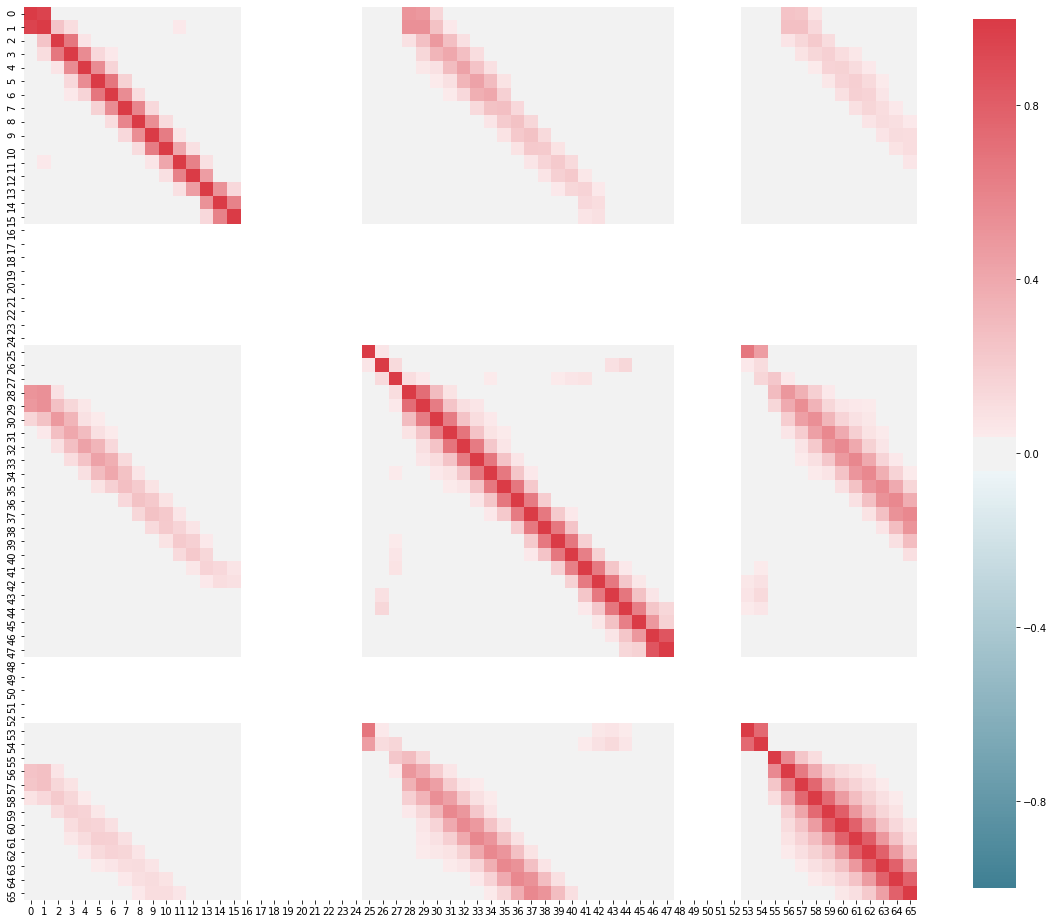

In [5]:
# Zoom de la estructura de la matriz de correlaciones
corrmat2=np.corrcoef(X[:,range(34,100)].T)
plt.show()
plt.figure(figsize=(20,20))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
ax=sb.heatmap(corrmat2,vmin=-1, vmax=1,center=0,square=True,cmap=cmap,cbar_kws={"shrink": .8})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()